In [1]:
import heapq as hq
import networkx as nx
import matplotlib.pyplot as plt
# für 
from random import shuffle 

class Event:
    def __init__(self, time, action, bm):
        self.time = time
        self.action = action
        self.bm = bm
    def __lt__(self, other):
        return (self.time, self.bm) < (other.time, other.bm)
    def __le__(self, other):
        return (self.time, self.bm) <= (other.time, other.bm)

class passagier:
    def __init__(self, Station):
        self.station = Station
        #self.umstieg = {'Umstieg': False, 'Station': Station}
        self.umstieg = False
        self.time = 0
    def __lt__(self, other):
        return (self.time) < (other.time)
        #return (self.time, self.station) < (other.time, other.station)
        #return (self.time, self.station, self.umstieg) < (other.time, other.station, other.umstieg)
    def __le__(self, other):
        return (self.time) <= (other.time)
        #return (self.time, self.station, self.umstieg) <= (other.time, other.station, other.umstieg)
        #return (self.time, self.station, self.umstieg) <= (other.time, other.station, other.umstieg)
        

def shuffle0(passengers):
    for i in range(len(passengers)):
        x = [j for j in range(len(passengers[i]))]
        shuffle(x)
        passengers[i] = [passengers[i][k] for k in x]

def calc_pic(grah, ListeColor, ListeSize):
    nx.draw(graph, pos, with_labels = True, node_color = ListeColor, node_size = ListeSize)
    #nx.draw_kamada_kawai(graph, with_labels = True, node_color = ListeColor, node_size = ListeSize)
    


In [33]:
# Lösung für Passger als Classe
def solve(eventq, passengers, bms, graph):
    
    v = [len([idx for idx, passenger in enumerate(passengers[n]) if passenger.station == n]) == 0 for n in range(len(passengers))]
    if not (v == [True]*len(passengers)):
        ErrorMessage = 'Bei Passengers ist man Knoten {} Passagiere die in gleiche Sationen'.format([idx for idx, boolean in enumerate(v) if boolean == False])
        raise Exception(ErrorMessage)
    
    if not True:
        return 'Hallo'
    
    if not (len(graph.node)) == (len(passengers)):
        ErrorMessage = 'Die Graphiken werden Fehler haft berrechnet.\n'
        if len(graph.node) < len(passengers):
            ErrorMessage += 'Es sind zu viele Einträge in Passengers ({}) als Knoten in Graph ({})'.format(len(passengers),len(graph.node)) + '\n'
            ErrorMessage += 'Löschen/Fügen Sie ({}) Einträge/Knoten in Passengers/Graph'.format(abs(len(passengers) - len(graph.node)))
        else:
            ErrorMessage += 'Es sind zu wenige Einträge in Passengers ({}) als Knoten in Graph ({})'.format(len(passengers),len(graph.node)) + '\n'
            ErrorMessage += 'Fügen/Löschen Sie ({}) Einträge/Knoten in Passengers/Graph'.format(abs(len(passengers) - len(graph.node)))
        raise Exception(ErrorMessage)
    
    if not [len(bms[i]['itinerary']) == len(bms[i]['travel_times']) for i in range(len(bms))] == [True]*len(bms):
        raise Exception('In der Liste BMS ist itinerary und travel_times nicht gleich groß')
    ####
    # Visualisierung
    ListeNodes = list(graph.node)
    ListeColor = ['#000000']*len(ListeNodes)
    ####
    
    #save(passengers, bms)
    zykel = 0
    while eventq:
        print('Durch läuft die While-Schleine zum {} mal'.format(zykel))
        # Abbruch Bedingung
        if ([len(passengers[i]) == 0 for i in range(len(passengers))] == [True]*len(passengers)) and ([len(bms[i]['n_passengers']) == 0 for i in range(len(bms))] == [True]*len(bms)):
            return print('Ende')
        event = hq.heappop(eventq)
        bm = bms[event.bm]
        print(bm['stop'])
        itinerary_len = len(bm['itinerary'])
        current_node = bm['itinerary'][bm['stop'] % itinerary_len]
        cn_number = [idx for idx, station in enumerate(bm['itinerary']) if station == current_node][0] #Current Node Number
        
        next_node = bm['itinerary'][(bm['stop']+1) % itinerary_len]
        nn_number = [idx for idx, station in enumerate(bm['itinerary']) if station == next_node][0]
        print('Fahrzeug {} ist am Knoten {}, der nächste Halt {}, die aktuelle Zeit: {}'.format(bm['name'],current_node, next_node, event.time))
        #print('Fahrzeug {} Stopp zum {} mal'.format(bm['name'],bm['stop']))
        
        ####
        # Visualisierung
        ListeSize = [len(i)*10 for i in passengers]
        ListeColor[current_node] = bm['color']
        calc_pic(graph, ListeColor, ListeSize)
        #plt.savefig("img/{}.png".format(event.time))
        #plt.show()
        ListeColor[current_node] = '#000000'
        ####
        
        if event.action == 'load':
            #print('Program ist im Zustand: {}'.format(event.action))
            free = bm['capacity'] - len(bm['n_passengers'])
            print('Fahrzeug {} load'.format(bm['name']))
            print('Fahrzeug {} hat {} Plätze frei'.format(bm['name'],free))
            while len(bm['n_passengers']) < bm['capacity']:
                
                if not current_node < len(passengers):
                    raise Exception('Die Länge von passengers {} ist <= current_node {}'.format(len(passengers),current_node))
                
                waiting = [idx for idx, passenger in enumerate(passengers[current_node]) if passenger.station in bm['itinerary']]
                #print('Warten: {}'.format(waiting))
                if not waiting:
                    break
                passenger = passengers[current_node].pop(waiting[0])
                
                exit_node = passenger.station
                en_nubmer = [idx for idx, station in enumerate(bm['itinerary']) if station == exit_node][0]
                #print('Zielknoten ist {}, und hat die Nummer: {}, ist {}'.format(exit_node, en_nubmer, cn_number))
                
                ListExit = []    
                for i in range((en_nubmer-cn_number)% itinerary_len):
                    ListExit += [ bm['travel_times'][(cn_number+i)%itinerary_len] ]
                ExitTime = event.time - 1
                for i in ListExit:
                    ExitTime += (i)
                #print('Exit Time: {}, und ListExit {}'.format(ExitTime,ListExit))
                
                passenger.time = ExitTime
                hq.heappush(bm['n_passengers'], passenger)
                hq.heappush(eventq, Event(ExitTime,'exit', bm['name']))
                
            #for i in bm['n_passengers']:
            #    print('(Station: {}, Exit Time: {})'.format(i.station,i.time))    
            hq.heappush(eventq, Event(event.time + bm['travel_times'][nn_number], 'load', event.bm))
            bm['stop'] += 1
            #print('Es Warten noch {} an {}'.format(len(passengers[current_node]),current_node))
        #ListeColor[current_node] = 'blue'
        # Generate events for exiting passengers
        
        elif event.action == 'exit':
            #print('Program ist im Zustand: {}'.format(event.action))
            #for i in bm['n_passengers']:
            #    print('(Station: {}, Exit Time: {})'.format(i.station,i.time))
            
            ####
            # Muss noch gemacht werden!!
            ######################
            i = 0
            while i==0:
                GetOut = [idx for idx, passenger in enumerate(bm['n_passengers']) if (passenger.time == event.time) and (passenger.station == current_node)]
                if not GetOut:
                    print('Something is Wrong, len "GetOut" {}'.format(len(GetOut)))
                    passenger = hq.heappop(bm['n_passengers'])
                    #raise Exception('Unknown event action')
                    break
                passenger = bm['n_passengers'].pop(GetOut[0])
                i+=1
            ######################
            
            #passenger = hq.heappop(bm['n_passengers'])
            print('PassagierStation:{} PassagierTime:{}, Umstieg {} steit aus, EventTime {}'.format(passenger.station, passenger.time, passenger.umstieg,event.time))
            print('Ist EvenTime == PassagierTime: {}'.format(passenger.time == event.time))
            print('Passagier am richtigen Ort: {}'.format(passenger.station == current_node))
            if [passenger.station == current_node] == [False]:
                passengers[current_node] += [passenger]
                shuffle0(passengers)
                print('Passagier mit Ziel: {}, wurde falsch berechnet.'.format(passenger.station))
            print('Es sind {} Passagiere in der Bahn'.format(len(bm['n_passengers'])))
            
            
        else:
            raise Exception('Unknown event action')
        zykel += 1

In [34]:
graph = nx.Graph()

graph.add_node('Hbf', pos=(10,10))  #0
graph.add_node('INF', pos=(10,30))  #1
graph.add_node('Phil', pos=(30,30))  #2
graph.add_node('Uni', pos=(40,20))  #3
graph.add_node('Bism', pos=(30,10))  #4
graph.add_node('Rohr', pos=(30,0))  #5
graph.add_node('Hand', pos=(15,40))  #6
graph.add_node('Zieg', pos=(50,30))  #7

ListeNodes = list(graph.node)
#Rundfahrt 
graph.add_edge(ListeNodes[0],ListeNodes[1])
graph.add_edge(ListeNodes[1],ListeNodes[0])
graph.add_edge(ListeNodes[1],ListeNodes[2])
graph.add_edge(ListeNodes[2],ListeNodes[1])
graph.add_edge(ListeNodes[2],ListeNodes[3])
graph.add_edge(ListeNodes[3],ListeNodes[2])
graph.add_edge(ListeNodes[3],ListeNodes[4])
graph.add_edge(ListeNodes[4],ListeNodes[3])
graph.add_edge(ListeNodes[4],ListeNodes[0])
graph.add_edge(ListeNodes[0],ListeNodes[4])

#Zubringer
graph.add_edge(ListeNodes[4],ListeNodes[5])
graph.add_edge(ListeNodes[5],ListeNodes[4])
graph.add_edge(ListeNodes[1],ListeNodes[6])
graph.add_edge(ListeNodes[6],ListeNodes[1])
graph.add_edge(ListeNodes[3],ListeNodes[7])
graph.add_edge(ListeNodes[7],ListeNodes[3])


pos=nx.get_node_attributes(graph,'pos')
#nx.draw(graph,pos,with_label=True)
print(ListeNodes)
graph[ListeNodes[3]]

['Hbf', 'INF', 'Phil', 'Uni', 'Bism', 'Rohr', 'Hand', 'Zieg']


AtlasView({'Phil': {}, 'Bism': {}, 'Zieg': {}})

In [35]:
bms = [{'color': '#f0f000', 'n_passengers': [], 'capacity': 30, 'stop': 0, 'itinerary': [4, 3, 2, 1, 0], 'name': 0, 'travel_times': [10, 10, 10, 10, 10]},
    {'color': '#f000f0', 'n_passengers': [], 'capacity': 30, 'stop': 0, 'itinerary': [0, 1, 2, 3, 4], 'name': 1, 'travel_times': [10, 10, 10, 10, 10]},
    {'color': '#ff0000', 'n_passengers': [], 'capacity': 30, 'stop': 0, 'itinerary': [4,5], 'name': 2, 'travel_times': [10, 10]},
    {'color': '#00ff00', 'n_passengers': [], 'capacity': 30, 'stop': 0, 'itinerary': [1,6], 'name': 3, 'travel_times': [10, 10]},
    {'color': '#0000ff', 'n_passengers': [], 'capacity': 30, 'stop': 0, 'itinerary': [3,7], 'name': 4, 'travel_times': [10, 10]}
       ]#

passengers = [#
    [passagier(1)]*20 +[passagier(2)]*20 +[passagier(3)]*20, #0
    [passagier(0)]*20 +[passagier(2)]*20 +[passagier(3)]*20, #1
    [passagier(0)]*20 +[passagier(1)]*20 +[passagier(3)]*20, #2
    [passagier(0)]*20 +[passagier(2)]*20 +[passagier(1)]*20, #3
    [passagier(0)]*20 +[passagier(2)]*20 +[passagier(3)]*20, #4
    [passagier(4)]*20, #5
    [passagier(1)]*20, #6
    [passagier(3)]*20  #7
               ]

# shuffle passengers
shuffle0(passengers)

Durch läuft die While-Schleine zum 0 mal
0
Fahrzeug 0 ist am Knoten 4, der nächste Halt 3, die aktuelle Zeit: 0
Fahrzeug 0 load
Fahrzeug 0 hat 30 Plätze frei
Durch läuft die While-Schleine zum 1 mal
0
Fahrzeug 1 ist am Knoten 0, der nächste Halt 1, die aktuelle Zeit: 0
Fahrzeug 1 load
Fahrzeug 1 hat 30 Plätze frei
Durch läuft die While-Schleine zum 2 mal
0
Fahrzeug 2 ist am Knoten 4, der nächste Halt 5, die aktuelle Zeit: 0
Fahrzeug 2 load
Fahrzeug 2 hat 30 Plätze frei
Durch läuft die While-Schleine zum 3 mal
0
Fahrzeug 3 ist am Knoten 1, der nächste Halt 6, die aktuelle Zeit: 0
Fahrzeug 3 load
Fahrzeug 3 hat 30 Plätze frei
Durch läuft die While-Schleine zum 4 mal
0
Fahrzeug 4 ist am Knoten 3, der nächste Halt 7, die aktuelle Zeit: 0
Fahrzeug 4 load
Fahrzeug 4 hat 30 Plätze frei
Durch läuft die While-Schleine zum 5 mal
1
Fahrzeug 0 ist am Knoten 3, der nächste Halt 2, die aktuelle Zeit: 9
PassagierStation:3 PassagierTime:9, Umstieg False steit aus, EventTime 9
Ist EvenTime == Passagier

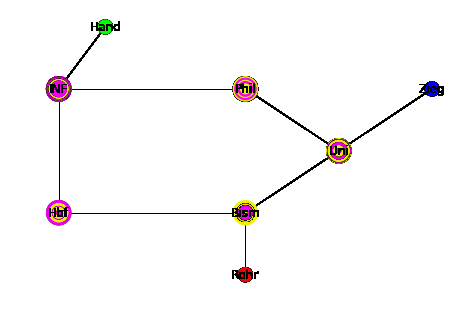

In [36]:
event0 = Event(0,'load',0)
event1 = Event(0,'load',1)
event2 = Event(0,'load',2)
event3 = Event(0,'load',3)
event4 = Event(0,'load',4)
eventq = []
hq.heappush(eventq, event0)
hq.heappush(eventq, event1)
hq.heappush(eventq, event2)
hq.heappush(eventq, event3)
hq.heappush(eventq, event4)

solve(eventq, passengers, bms, graph)